<a href="https://colab.research.google.com/github/Shivam29107997/Shivam-Vatsayan/blob/main/face%20recognition%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

In [2]:
!pip install face_recognition


     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=00dc6052ae585e11bc09ba12083c128b010f4a6994d32391980949bfc097ea7d
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import face_recognition

Training **Images**

In [5]:
import face_recognition
import   numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
import cv2
from datetime import datetime

face_1 = face_recognition.load_image_file("elon.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("sam.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("tony.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

face_4= face_recognition.load_image_file("oliver.jpg")
face_4_encoding = face_recognition.face_encodings(face_4)[0]

face_5 = face_recognition.load_image_file("shivam.jpeg")
face_5_encoding = face_recognition.face_encodings(face_5)[0]

face_6 = face_recognition.load_image_file("mubariz.jpg")
face_6_encoding = face_recognition.face_encodings(face_6)[0]



known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding,
    face_4_encoding,
    face_5_encoding,
    face_6_encoding
]
known_face_names = [
    "Elon Musk",
    "Sam",
    "Tony",
    "Olive",
    "Shivam",
    "Mubariz"
]
print("Done learning and creating profiles")

Done learning and creating profiles


In [6]:
def Entry(name):
    with open('data.xlsx','r+') as FILE:
        allLines = FILE.readlines()
        List = []
        for line in allLines:
            entry = line.split(',')
            List.append(entry[0])
        if name not in List:
            now = datetime.now()
            dtString = now.strftime('%d/%b/%Y, %H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

Performing Face Recognition for **image**

Elon Musk


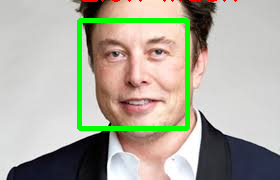

In [18]:
file_name = "unknow.el.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    Entry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)

**Performing Face Recognition for Video**

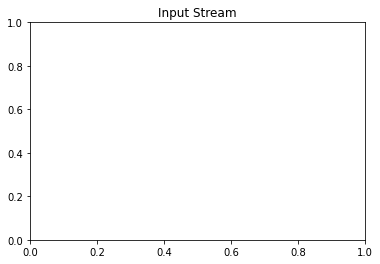

In [16]:
# Loading video for face detection
%pylab inline
import cv2
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

video_capture = cv2.VideoCapture("Tony Stark.mp4")
ret, frame = video_capture.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 5 frames to speed up process.
    frame_count += 1
    if frame_count % 5 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display video frame
        title("Input Stream")
        # plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

        for (face_location,face_encoding) in zip(face_locations,face_encodings):
          matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

          name = "Unknown"

          face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
          best_match_index = np.argmin(face_distances)
          if matches[best_match_index]:
            name = known_face_names[best_match_index]
          print(name)
          Entry(name)
          color = (0,0,)
          start_point = (face_location[3],face_location[0])
          end_point = (face_location[1],face_location[2])
          frame = cv2.rectangle(frame, start_point, end_point, color, 2) 
          frame = cv2.putText(frame,name,(face_location[3]-0, face_location[0]-20),cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2, cv2.LINE_AA) 
          frame_copy = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
          out.write(frame_copy)
          plt.imshow(frame)

        

        #Show frame...
        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)
out.release()